# Predicting heart disease using Machine Learning


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Project structure:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition


The problem we will be exploring binary classification.

We're going to be using a number of different features about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

What is needed to be done here is to dive into the data the problem definition is based on. This may involve sourcing and defining different parameters, talking to experts about it and finding out what should be expected.


The original data came from the Cleavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease


Howevever, it's downloaded in a formatted way from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

The original database contains 76 attributes, but here only 14 attributes will be used.

## 3. Evaluation

Since machine learning is very experimental, you might state:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

The reason this is helpful is beacause it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features


1. age - age in years
<hr/>
2. sex - (1 = male; 0 = female)
<hr/>
3. cp - chest pain type
 * Typical angina: chest pain caused by decreased blood supply to heart
 * Atypical angina: chest pain not related to heart
 * Non-anginal pain: typically esophageal spasms (non heart-related)
 * Asymptomatic: chest pain not showing signs of disease
<hr/>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically a cause to concern
<hr/>
5. chol - serum cholestoral in mg/dl
 * serum = LDL + HDL + .2 * triglycerides
 * above 200 is cause for concern
<hr/>
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 * '>126' mg/dL signals diabetes
<hr/>
7. restecg - resting electrocardiographic results
 * 0.Nothing to note
 * 1.ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
 * 2.Possible or definite left ventricular hypertrophy
     * Enlarged heart's main pumping chamber
<hr/>
8. thalach - maximum heart rate achieved
<hr/>
9. exang - exercise induced angina (1 = yes; 0 = no)
<hr/>
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
<hr/>
11. slope - the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart
<hr/>
12. ca - number of major vessels (0-3) colored by flourosopy
 * colored vessel means the doctor can see the blood passing through
 * the more blood movement the better (no clots)
<hr/>
13. thal - thalium stress result
 * 1,3: normal
 * 6: fixed defect: used to be defect but ok now
 * 7: reversable defect: no proper blood movement when excercising
 <hr/>
14. target - person has disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing Tools

* Pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib\Seaborn for data visualization.
* Scikit-Learn for ML modelling and evaluation.

In [1]:
# Regular EDA and visualization librarues
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data
Load .csv file storing all tabular data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape # (rows, cols)

(303, 14)

# Data Exploration
The goal is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Finding out the quantity of each class
df['target'].value_counts()

,count
target,
1,165
0,138


Since two classes are close to even, the target column may be considered balanced. Ideally, all the target classes should have the same amount of samples.

Plot the target column by telling what kind of plot is preferred

<Axes: xlabel='target'>

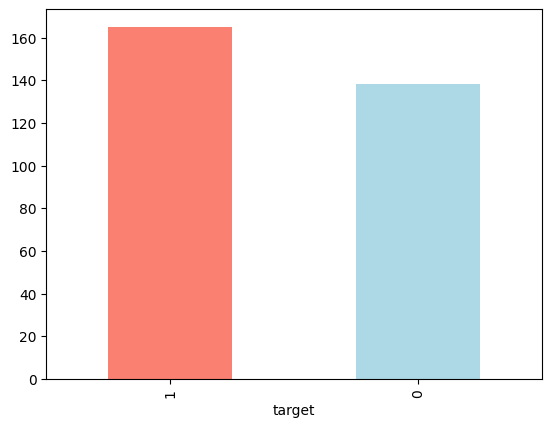

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

df.info() shows a quick insight to the number of missing values and what type of data is in every column.

In our case, there are no missing values and all of the columns are numerical.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check for missing values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## Heart Disease Frequency according to Sex
df.sex.value_counts()

,count
sex,
1,207
0,96


In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


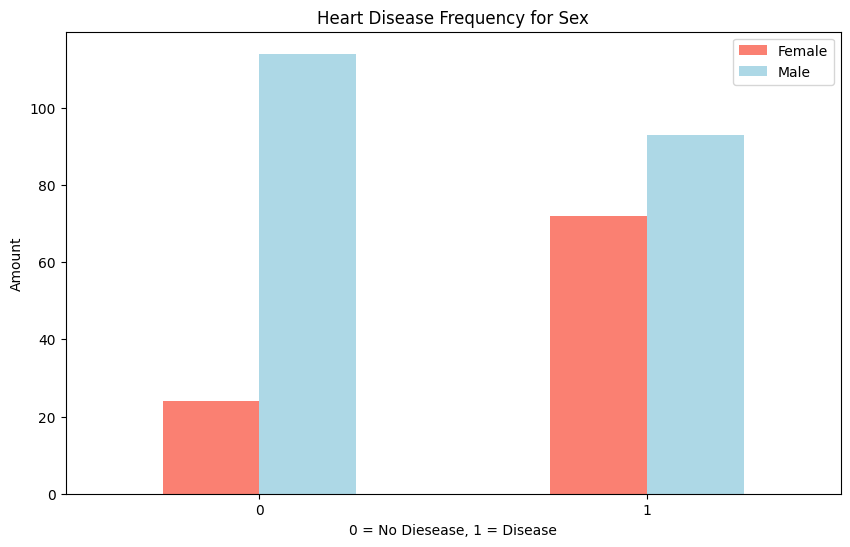

In [12]:
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"]
    )

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

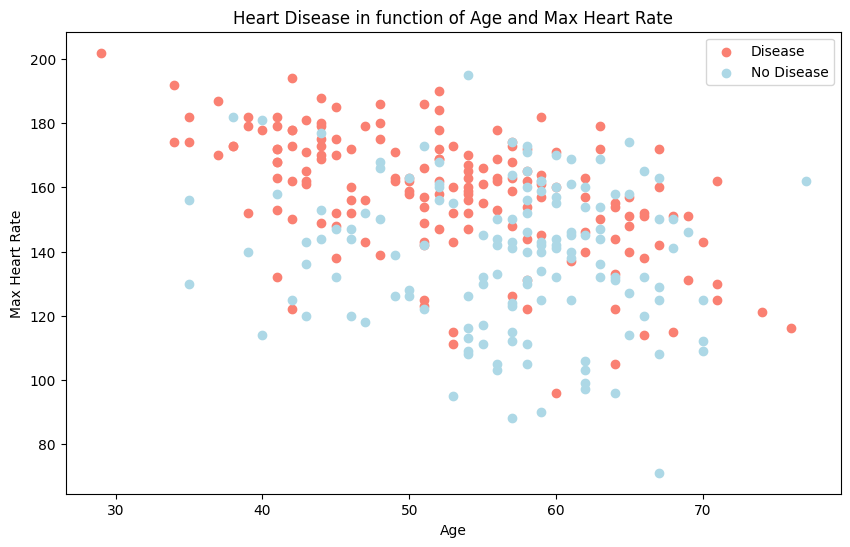

In [13]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: >

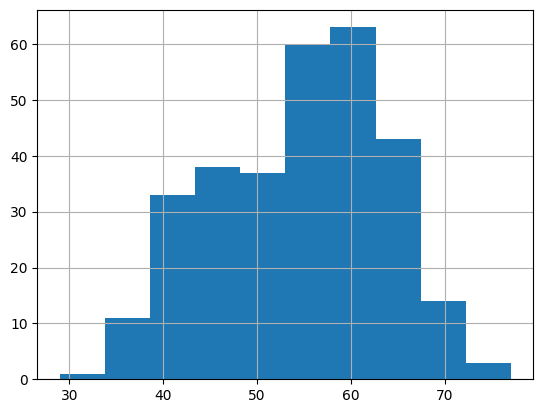

In [14]:
# Check the distribution of the age column with a histogram
df.age.hist()

## Heart Disease Frequency per Chest Pain Type

---
cp - chest pain type
 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


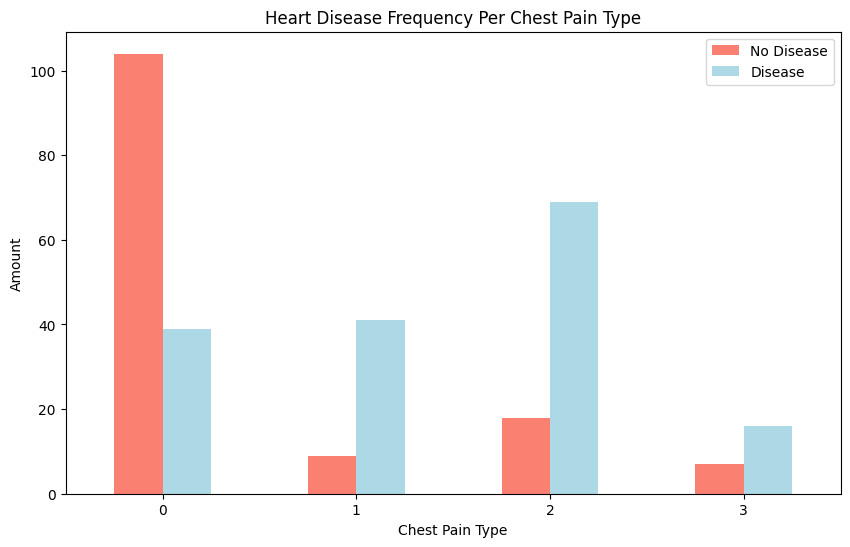

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Create a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

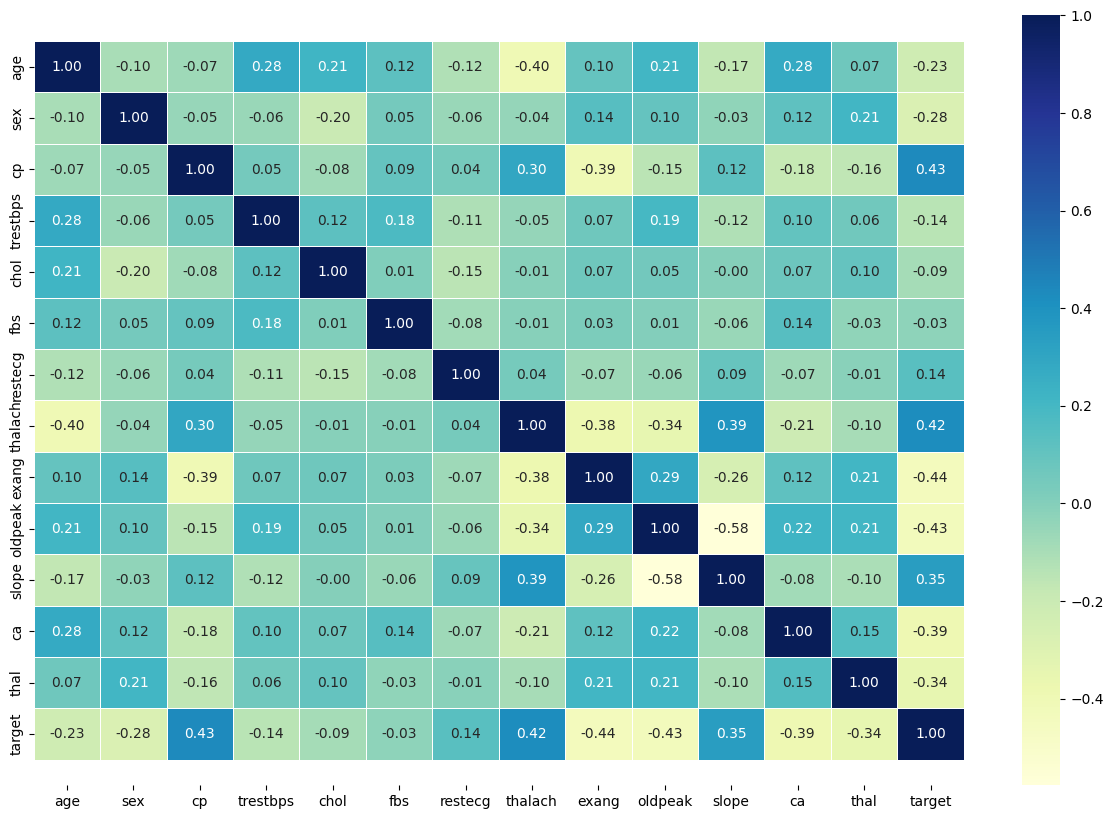

In [19]:
# Create a correlation matrix as a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

As the data is explored, now it's time to use machine learning to predict the target variable based on the 13 independent variables.

Reminder about the focus problem:

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Time to find the answer.

And reminder the evaluation metric:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The aim is set.

Before building a model, we need to make our dataset ready.


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop(['target'], axis=1)
y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0



To split the data into a training and test set, use Scikit-Learn's train_test_split() and feed it independent and dependent variables (X & y).

In [24]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(242, 13)

In [26]:
len(y_train)

242

## Model choices

Now the data is splitted into train and test sets, it's time to build a machine learning model.

The model will train on the training set.
It will test itself on the test set.

We're going to try 3 different machine learning models:

 * Logistic Regression
 * K-Nearest Neighbours Classifier
 * Random Forest Classifier

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

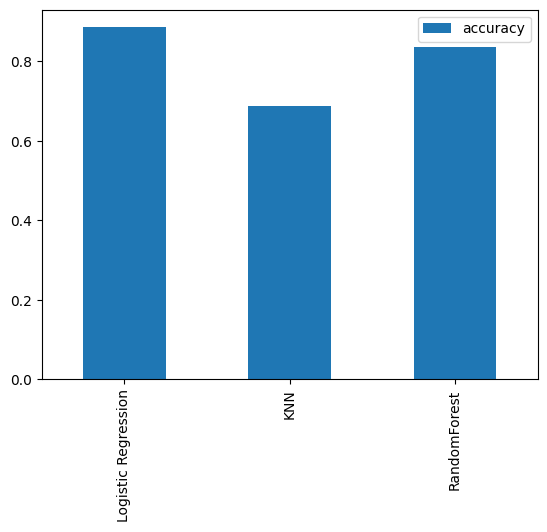

In [30]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now there is a baseline model, but model's first predictions aren't always what the next steps should be based off. What should be done?

Look at the following:

 * Hypyterparameter tuning
 * Feature importance
 * Confusion matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification report
 * ROC curve
 * Area under the curve (AUC)

# Hyperparameter tuning (by hand)


In [31]:
# Tune the KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through the different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))


In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


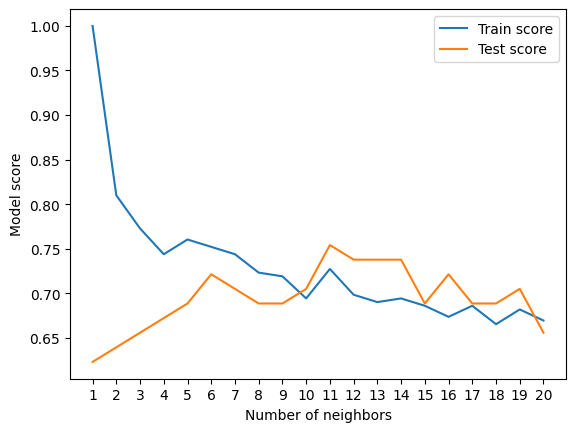

In [37]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV

Models to tune:
* LogisticRegression()
* RandomForestClassifier()

In [39]:
# Create Hyperparam grid for LogisticRegression()
log_reg_grid = {
    'C': np.logspace(-4, -4, 20),
    'solver': ['liblinear']
    }

# Create Hyperparam grid for RandomForestClassifier()
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

Tuning using RandomizedSearchCV()

In [51]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=1
)

#Fit RandomizedSearch with training data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.0001)}

In [54]:
rs_log_reg.score(X_test, y_test)

0.7868852459016393

In [53]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_grid,
    cv=5,
    n_iter=20,
    verbose=1
)

#Fit RandomizedSearch with training data
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [55]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [56]:
rs_rf.score(X_test, y_test)

0.8688524590163934

# Hyperparam tuning using GridSearchCV

In [57]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparam search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=1)

# Fit grid hyperparam search with training data
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [58]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [59]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluting tuned machine learning classifier beyond accuracy
 * ROC curve and AUC score
 * Confusion matrix
 * Classification report
 * Precision
 * Recall
 * F1-score

... and it would be great if cross-validation was used where possible.


We need to make predictions first before making comparisons and evaluating trained model.

In [60]:
# Make predictions with tuned model
y_pred = gs_log_reg.predict(X_test)

In [61]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [62]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


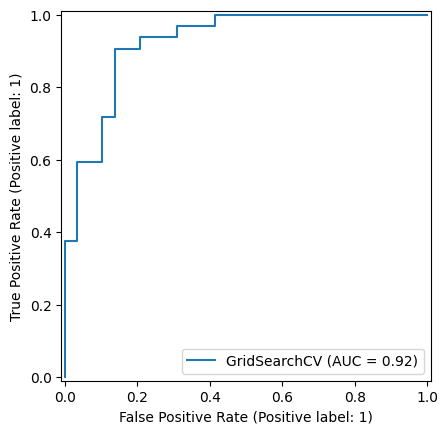

In [66]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [69]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 3, 29]])

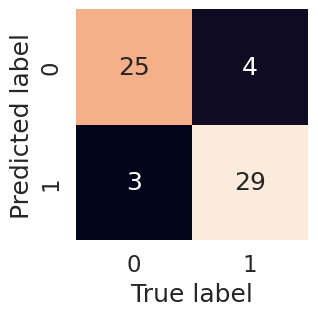

In [70]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(
      confusion_matrix(y_test, y_pred),
      annot=True,
      cbar=False
      )
  plt.xlabel('True label')
  plt.ylabel('Predicted label')

plot_conf_matrix(y_test, y_pred)

ROC curve and confusion matrix are done, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




 * Precision - Indicates the proportion of positive identifications which were actually correct. A model which produces no false positives has a precision of 1.0.
 * Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
 * F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
 * Support - The number of samples each metric was calculated on.
 * Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
 * Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
 * Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class outperforms another due to having more samples).


Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [73]:
# Check the best hyperparams
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [74]:
clf = gs_log_reg.best_estimator_

In [75]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

In [76]:
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [77]:
cv_acc.mean()

np.float64(0.8446994535519124)

In [78]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [79]:
cv_precision.mean()

np.float64(0.8207936507936507)

In [80]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [81]:
cv_recall.mean()

np.float64(0.9212121212121213)

In [82]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [83]:
cv_f1.mean()

np.float64(0.8673007976269721)

<Axes: title={'center': 'Cross-validated classification metrics'}>

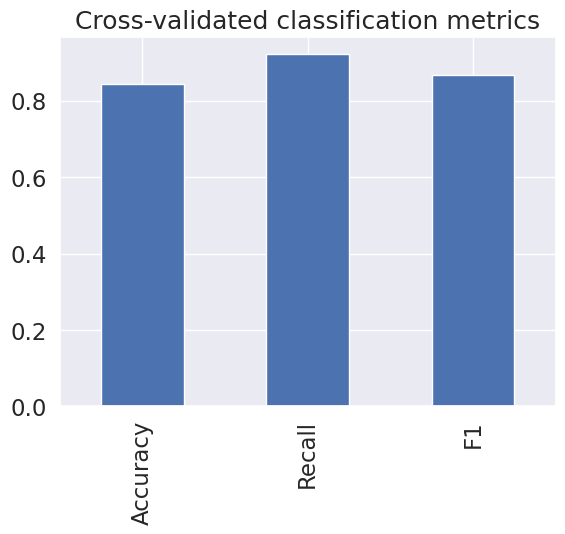

In [88]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc.mean(),
    'Recall': cv_recall.mean(),
    'F1': cv_f1.mean()
    }, index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend=False)

he final thing to check off the list of the model evaluation techniques is feature importance.

In [89]:
clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')

In [90]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
# Math coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [97]:
feature_dict

{'age': np.float64(0.0032076883508599633),
 'sex': np.float64(-0.8606204883695241),
 'cp': np.float64(0.660014324982524),
 'trestbps': np.float64(-0.01155970600550047),
 'chol': np.float64(-0.0016649614843449207),
 'fbs': np.float64(0.040172360271308105),
 'restecg': np.float64(0.31603405294617176),
 'thalach': np.float64(0.02458922341328129),
 'exang': np.float64(-0.604701713592625),
 'oldpeak': np.float64(-0.5679545646616215),
 'slope': np.float64(0.4508539209693025),
 'ca': np.float64(-0.6373332766360461),
 'thal': np.float64(-0.6755509369619848)}

<Axes: title={'center': 'Feature Importance'}>

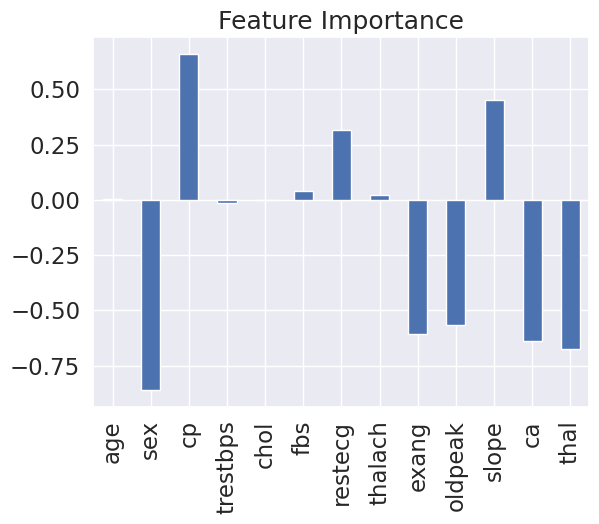

In [99]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [100]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [101]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.


This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.


Is this true?


When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

                               
What can you do with this information?

                               
This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

                               
Doing this has a few benefits:

                               
1. Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
3. Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.
